# Practice Session: Numerical Integration and differentiation

2025.03.19 (wed)

TA: Semin Cheon. KAIST Physics department. chsm0338@kaist.ac.kr

## Topic: How to implement methods:

#### Integration

- Riemann sum
- trapezoidal rule
- Simpson's rule
- Adaptive integration (Ex: trapezoidal rule)
- Romberg integration
- Gaussian quadrature

#### Differentiation
- Finite difference methods

## Integration

#### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Riemann sum, trapezoidal rule, Simpson's rule
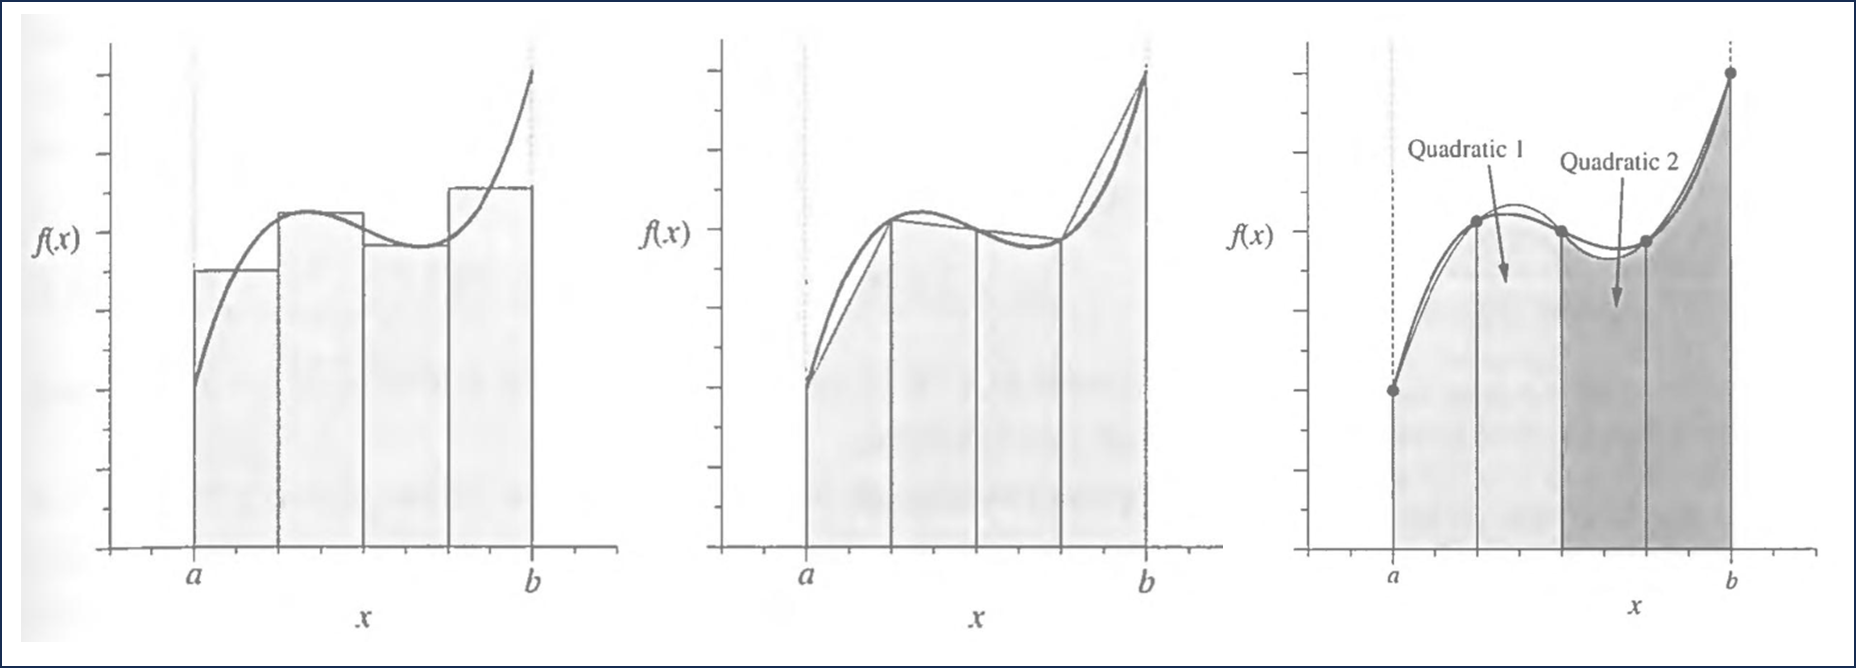

(Ref - Computational Physics, Mark Newmann, 2013)

Left - Riemann sum : I(a,b) = h*sum( f(a + kh) ), where k = 1 to N-1

Middle - trapezoidal rule : I(a,b) ~ h[ f(a)/2 + f(b)/2 + sum( f(a + kh) ) ], where k = 1 to N-1

Right - Simpson's rule : I(a,b) ~ h/3*[ f(a) + f(b) + 4*sum( f(a + (2k-1)h ) ) + 2*sum( f(a + 2lh ) ) ], where k = 1 to N/2 and l = 1 to N/2-1


### Target functions
1. f(x) = x^4 - 2x + 1, [0, 2]

2. f(x) = sin^2( 1/( x(2-x) ) ), [0, 2]

### x^4 - 2x + 1, [0, 2], N = 20

    Exact value: 4.4

#### Defining function

In [3]:
def f(x):
    return x**4 - 2*x + 1

#### Defining Number of step, Integration range, Step size according to the N, and sampling points

In [4]:
# N : Number of sapling points
# Integration_range : Range of integration...
# Intervals_h : step size according to "N" and "Integration_range"
# sampling_points : sampling points according to Intervals_h and 

N = 20

Integration_range = [0, 2]

Interval_h = ( Integration_range[1] - Integration_range[0] ) / N

sampling_points = np.arange(Integration_range[0], Integration_range[1] + Interval_h, Interval_h) # np.arange(Start, End, Step_size) => output: "Start" to "End - Step_size"


# Check the sampling results
print( "Number of the sampling points:", np.shape(sampling_points)[0] )
print( "Sampling points:", sampling_points )

Number of the sampling points: 21
Sampling points: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


#### Riemann sum

In [5]:
I_rie = np.sum( f(sampling_points[0:-1]) )*Interval_h

print(I_rie)

3.8266600000000013


#### trapezoidal rule

In [6]:
I_tra = Interval_h*( 1/2*f(sampling_points[0]) + 1/2*f(sampling_points[-1]) + np.sum( f(sampling_points[1:-1]) ) )
#           h                  f(a)/2                      f(b)/2                          sum(f) <- a+h to b-h
print(I_tra)

4.426660000000001


#### Simpson's rule

In [7]:
# Vectorize the indices

List_odd = np.arange(1, np.shape(sampling_points)[0] , 2) # Not including the first integer
List_even = np.arange(2, np.shape(sampling_points)[0] - 1, 2) # Not including the first and the last integer

print( List_odd, "\n\n", List_even )

[ 1  3  5  7  9 11 13 15 17 19] 

 [ 2  4  6  8 10 12 14 16 18]


In [8]:
I_sim = Interval_h/3*( f(sampling_points[0]) + f(sampling_points[-1]) + 4*np.sum( f( sampling_points[List_odd] ) ) + 2*np.sum( f( sampling_points[List_even] ) ) )
#           h/3               f(a)                    f(b)                               4*sum( f_odd )                             2*sum( f_even )
print(I_sim)

4.400026666666667


#### Comparison

In [9]:
print( "Riemann sum:       {:.6f}".format(I_rie) )
print( "trapezoidal rule:  {:.6f}".format(I_tra) )
print( "Simpson rule:      {:.6f}".format(I_sim) )

Riemann sum:       3.826660
trapezoidal rule:  4.426660
Simpson rule:      4.400027


#### Adaptive integration (Ex: trapezoidal rule)
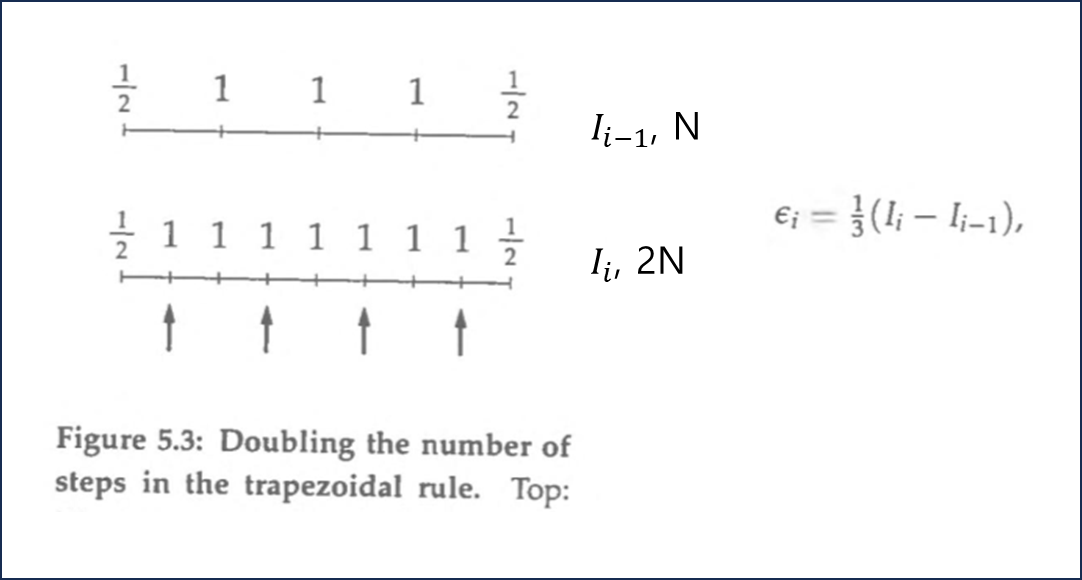

In [10]:
N = 2

Integration_range = [0, 2]

Interval_h = ( Integration_range[1] - Integration_range[0] ) / N

sampling_points = np.arange(Integration_range[0], Integration_range[1] + Interval_h, Interval_h) # np.arange(Start, End, Step_size) => output: "Start" to "End - Step_size"


# Simple and Rough guess on I(a,b) for N =2 
I_tra = Interval_h*( 1/2*f(sampling_points[0]) + 1/2*f(sampling_points[-1]) + np.sum( f(sampling_points[1:-1]) ) )
print(I_tra)

7.0


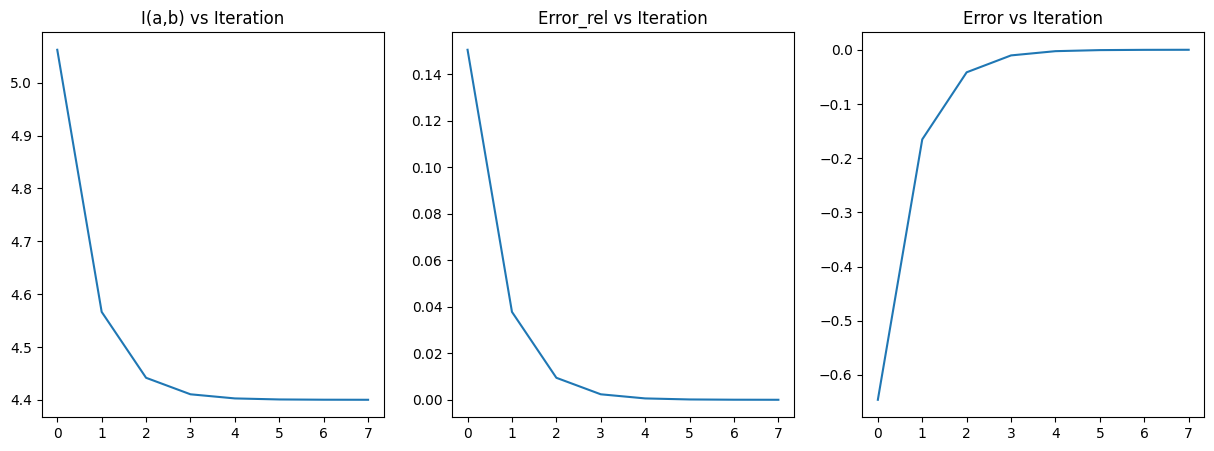

In [11]:
True_value = 4.4

Iteration = 8

Itegration_list_adaptive = []
error_list_rel = []
error_list = []
# error_list.append(0)
I_previous = I_tra
N_adaptive = N

for intergration_count in range(Iteration):
    N_adaptive *= 2
    Interval_adaptive = ( Integration_range[1] - Integration_range[0] ) / N_adaptive
    x_variables_adaptive = np.arange(Integration_range[0], Integration_range[1] + Interval_adaptive, Interval_adaptive) # np.arange(Start, End, Step_size)
    List_odd_adaptive = np.arange(1, np.shape(x_variables_adaptive)[0] , 2)
    
    I_run = Interval_adaptive*np.sum( f(x_variables_adaptive[List_odd_adaptive]) ) + I_previous/2
    current_error = np.abs(True_value - I_run)/True_value

    # Record the result
    Itegration_list_adaptive.append( I_run )
    error_list_rel.append( current_error )
    error_list.append( (I_run - I_previous)/3 )

    I_previous = I_run

plt.rcParams['figure.dpi'] = 100 # figure size
plt.rcParams.update(
    {"figure.figsize": (15, 5), "font.size": 10, "lines.markersize": 10}
)
plt.subplot(1,3,1)
plt.plot(range(Iteration), Itegration_list_adaptive)
plt.title("I(a,b) vs Iteration")
plt.subplot(1,3,2)
plt.plot(range(Iteration), error_list_rel)
plt.title("Error_rel vs Iteration")
plt.subplot(1,3,3)
plt.plot(range(Iteration), error_list)
plt.title("Error vs Iteration")
plt.show()

#### Romberg integration
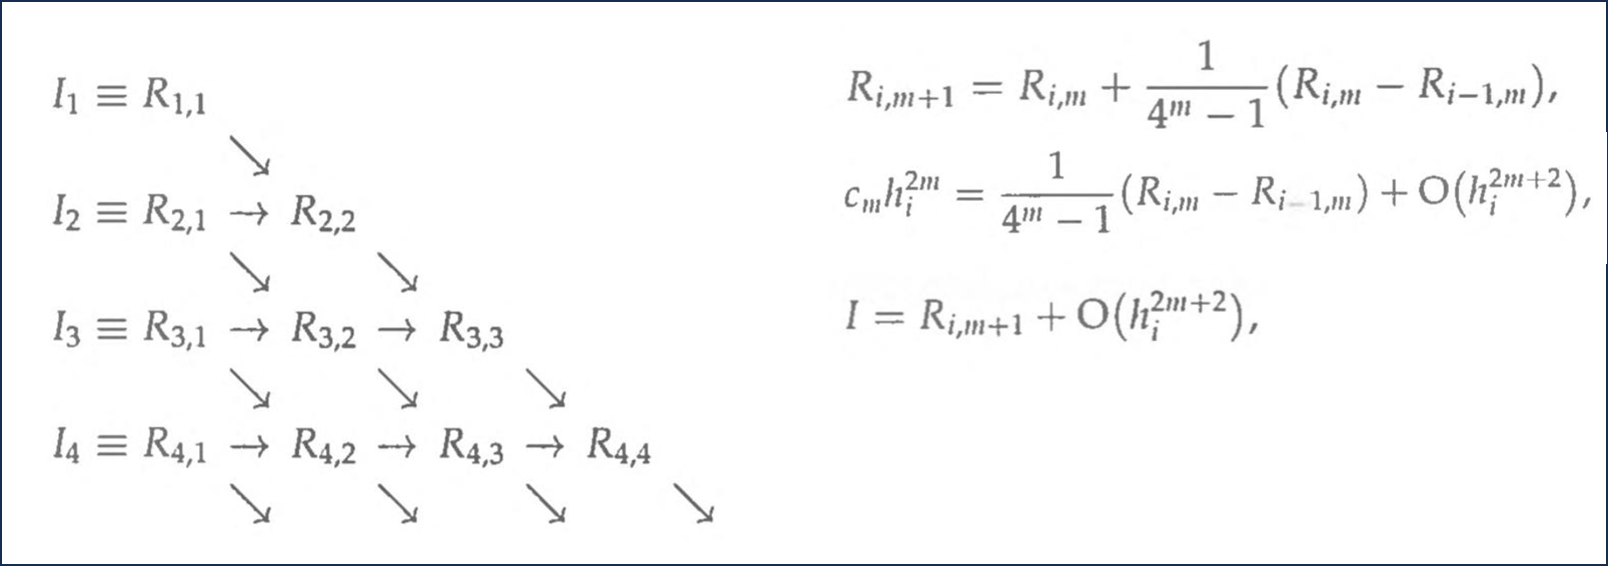
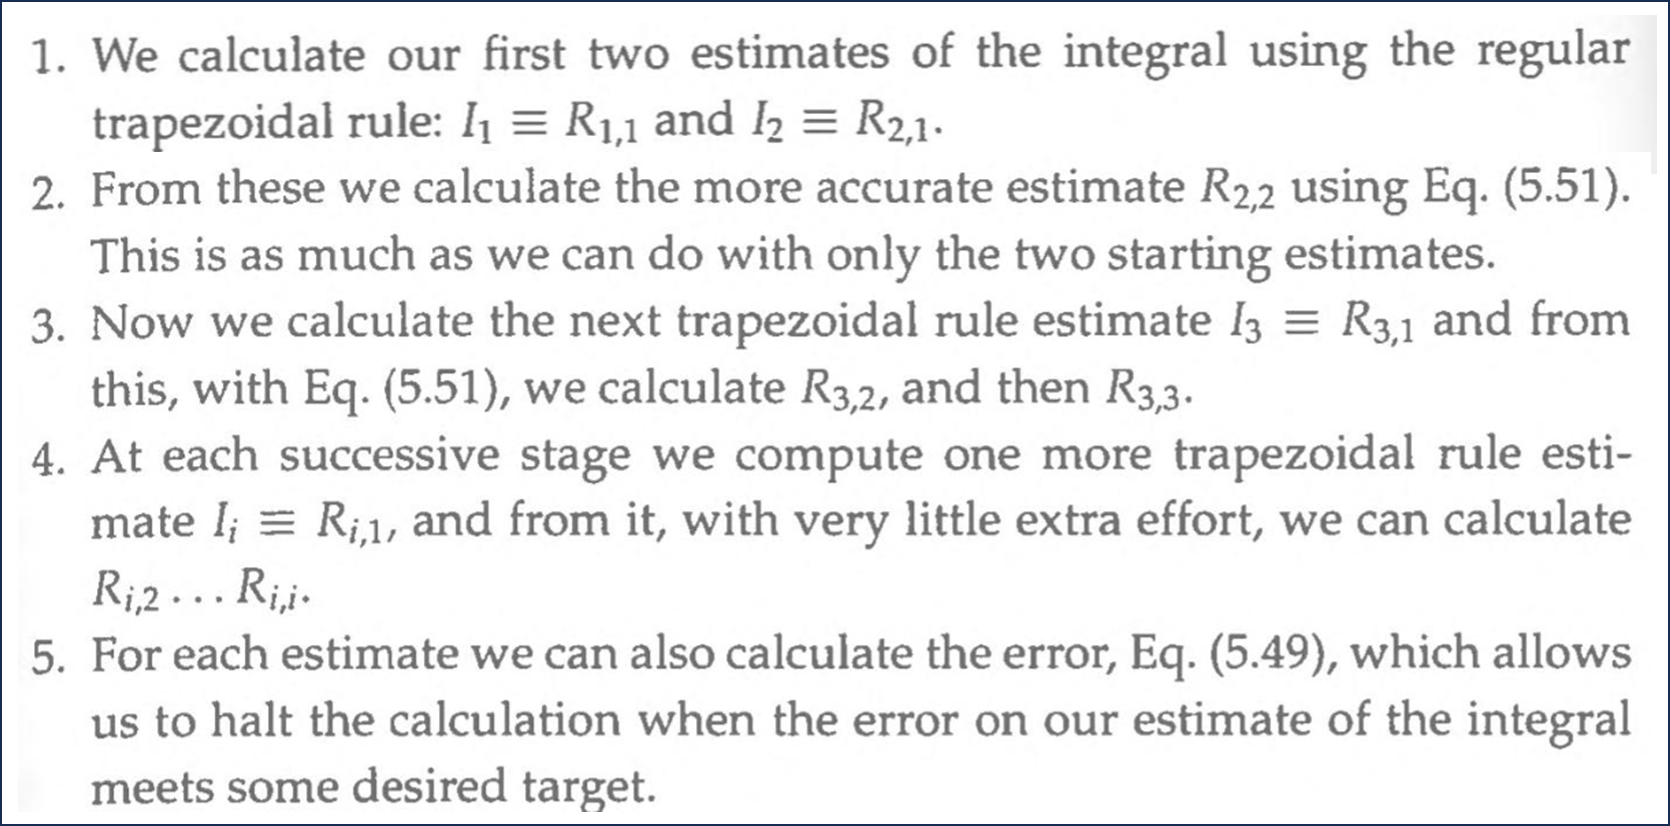

In [12]:
N = 2
Integration_range = [0, 2]
Interval_h = ( Integration_range[1] - Integration_range[0] ) / N
sampling_points = np.arange(Integration_range[0], Integration_range[1] + Interval_h, Interval_h) # np.arange(Start, End, Step_size) => output: "Start" to "End - Step_size"

# Simple and Rough guess on I(a,b) for N = 2 
I_tra = Interval_h*( 1/2*f(sampling_points[0]) + 1/2*f(sampling_points[-1]) + np.sum( f(sampling_points[1:-1]) ) )
print(I_tra)

7.0


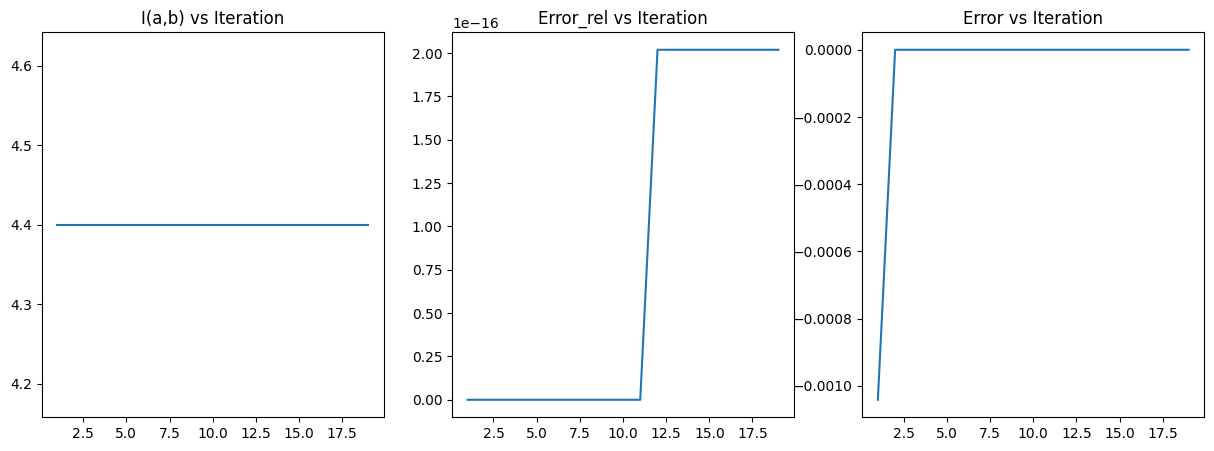

In [13]:
True_value = 4.4

Iteration = 20

Itegration_list_romberg = []
error_list_rel = []
error_list = []

I_previous = I_tra
N_adaptive = N

R_previous_list = [] # R_(i-1,m)
R_list = [] # R_(i,m)

R_previous_list.append(I_previous)

for intergration_count in range(Iteration):
    N_adaptive *= 2
    Interval_adaptive = ( Integration_range[1] - Integration_range[0] ) / N_adaptive
    x_variables_adaptive = np.arange(Integration_range[0], Integration_range[1] + Interval_adaptive, Interval_adaptive) # np.arange(Start, End, Step_size)
    List_odd_adaptive = np.arange(1, np.shape(x_variables_adaptive)[0] , 2)
    
    I_tra_i = Interval_adaptive*np.sum( f(x_variables_adaptive[List_odd_adaptive]) ) + I_previous/2
    I_previous = I_tra_i

    R_list.append(I_tra_i)

    for m in np.arange(1, intergration_count + 1 + 1):

        New_R = R_list[m-1] + (R_list[m-1] - R_previous_list[m-1])/(4**(m) - 1)
        R_list.append(New_R)

    computatioinal_error = (R_list[m-1] - R_previous_list[m-1])/(4**(m) - 1)
    current_error = np.abs(True_value - New_R)/True_value
    
    R_previous_list = R_list
    R_list = []
    
    Itegration_list_romberg.append( New_R )
    error_list_rel.append( current_error )
    error_list.append( computatioinal_error )


plt.rcParams['figure.dpi'] = 100 # figure size
plt.rcParams.update(
    {"figure.figsize": (15, 5), "font.size": 10, "lines.markersize": 10}
)
plt.subplot(1,3,1)
plt.plot(range(Iteration)[1:], Itegration_list_romberg[1:])
plt.title("I(a,b) vs Iteration")
plt.subplot(1,3,2)
plt.plot(range(Iteration)[1:], error_list_rel[1:])
plt.title("Error_rel vs Iteration")
plt.subplot(1,3,3)
plt.plot(range(Iteration)[1:], error_list[1:])
plt.title("Error vs Iteration")
plt.show()

#### Gaussian quadrature (n-points Gaussian quadrature, non-uniform sampling)
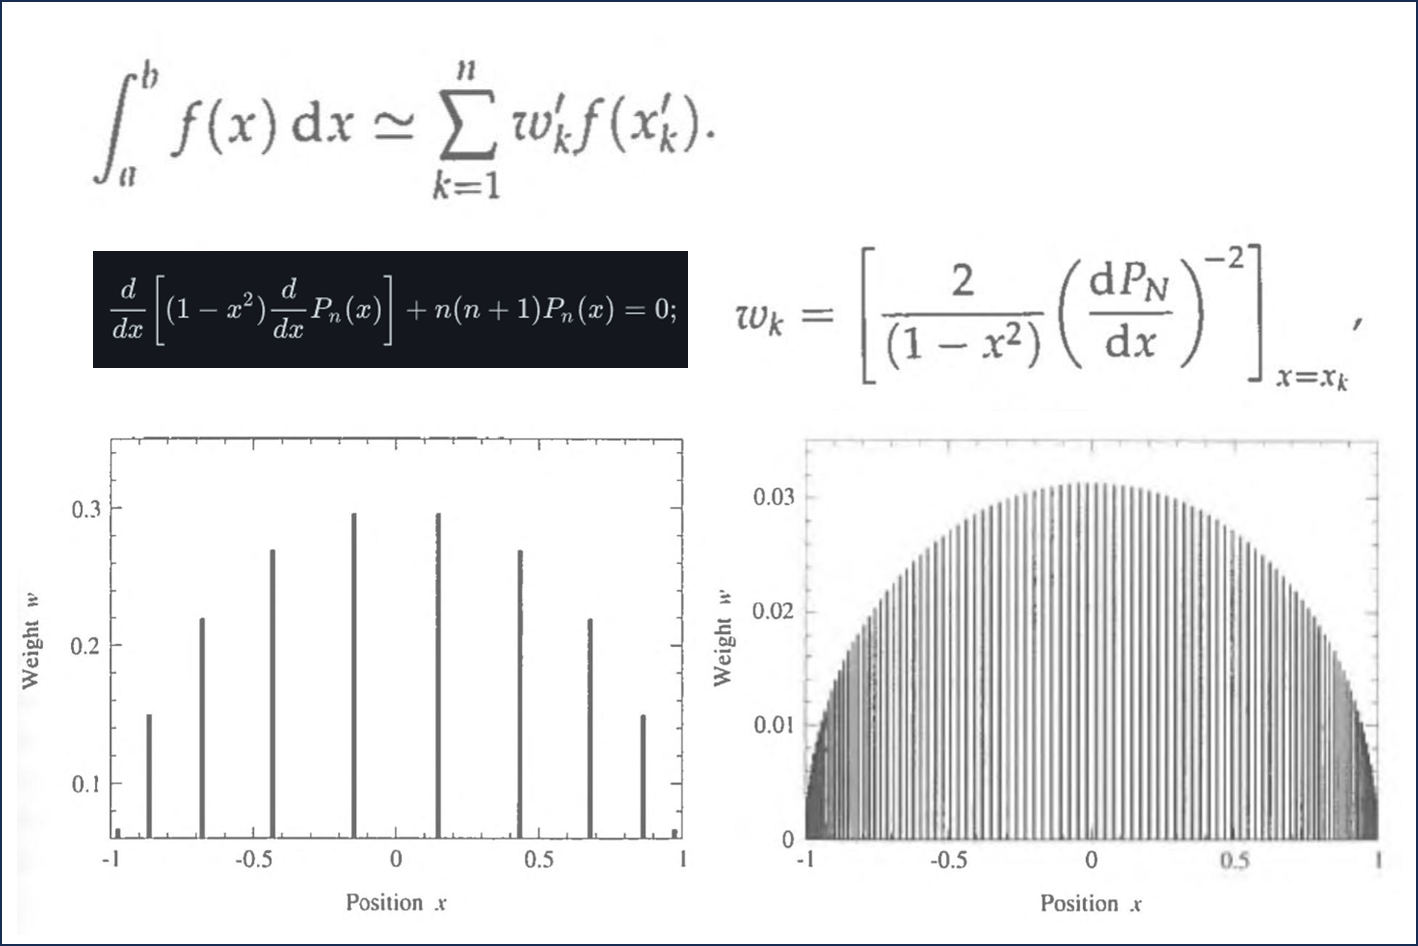

In [20]:
# https://numpy.org/doc/2.2/reference/generated/numpy.polynomial.legendre.Legendre.html

def legendre_roots(n):
    
    return np.polynomial.legendre.legroots( np.polynomial.legendre.Legendre.basis(n).coef )

def legendre_derivative(n, x):
    
    Pn = np.polynomial.legendre.Legendre.basis( n )  # Get P_n(x)
    dPn = Pn.deriv()  # Differentiate to get dP_n(x)/dx
    
    return dPn(x)  # dP/dx at x

In [23]:
def gaussian_quadrature( N ):
    # Initial approximation to roots of the Legendre polynomial
    x = legendre_roots( N )
    
    dpdx = legendre_derivative(N, x)

    # Calculate the weights
    w = 2/(1-x**2)/(dpdx**2)

    return x,w

def gaussian_quadrature_ab(N, a, b):
    x, w = gaussian_quadrature(N)
    
    return 1/2*(b - a)*x + 1/2*(b + a), 0.5*(b - a)*w

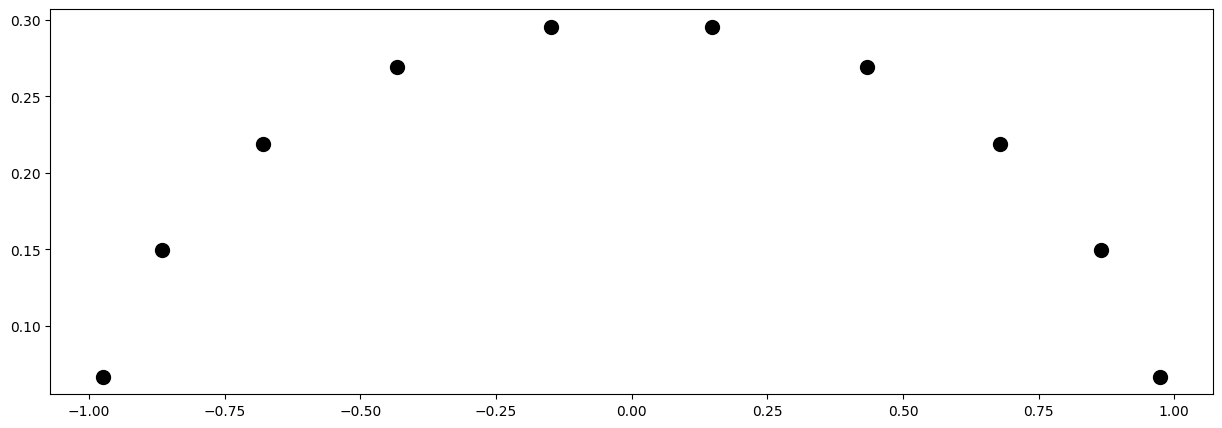

In [24]:
x, w = gaussian_quadrature(10)

plt.plot(x, w, 'ko')
plt.show()

In [43]:
N = 1000

Integration_range = [0, 2]

x, w = gaussian_quadrature_ab( N, Integration_range[0], Integration_range[1] )

I_gaussian_quadrature = np.sum( w*f(x) )

    
print( I_gaussian_quadrature )

4.39999999999986


### f(x) = sin^2( 1/( x(2-x) ) ), [0, 2]

In [46]:
# Try yourself!

N = 10000

Integration_range = [0, 2]

x, w = gaussian_quadrature_ab( N, Integration_range[0], Integration_range[1] )

y = np.sin( 1 / (x * (2 - x))) ** 2

I_gaussian_quadrature = np.sum( y )
    
print( I_gaussian_quadrature )


6576.39597935133


C:\Users\pco0511\AppData\Local\Temp\ipykernel_18360\1299145025.py:2: RuntimeWarning: divide by zero encountered in divide
  yy = np.sin( 1 / (xx * (2 - xx))) ** 2
C:\Users\pco0511\AppData\Local\Temp\ipykernel_18360\1299145025.py:2: RuntimeWarning: invalid value encountered in sin
  yy = np.sin( 1 / (xx * (2 - xx))) ** 2


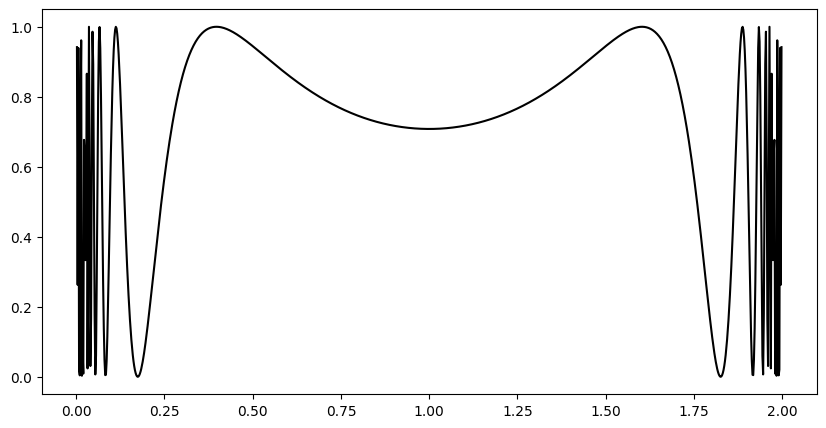

In [42]:
xx = np.linspace(0, 2, 1000)
yy = np.sin( 1 / (xx * (2 - xx))) ** 2

plt.figure(figsize=(10, 5))
plt.plot(xx, yy, 'k-')

## Differentiation

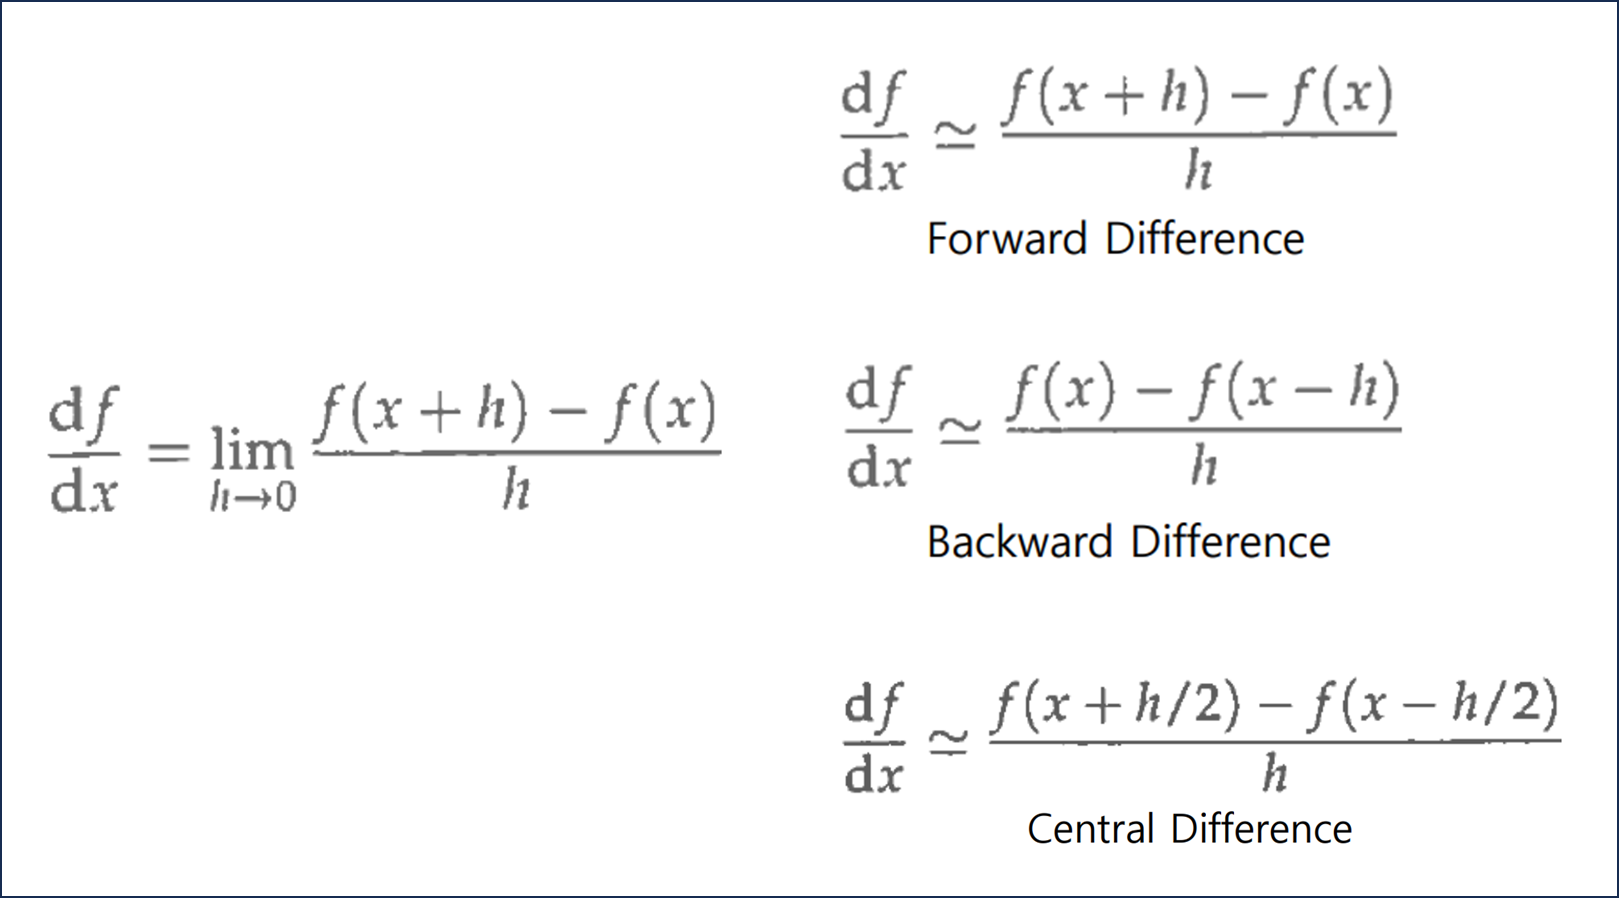

Estimating the derivative of a function f(x)

- Forward / Backward / Central difference

Also see the reference: https://en.wikipedia.org/wiki/Finite_difference

#### Target function
    x^4 - 2x + 1, [0, 2]
    => 4*x^3 -2

In [30]:
def f(x):
    return x**4 - 2*x + 1

#### Finite difference methods

In [31]:
# Finite difference methods
def df_exact(x):
    return 4*x**3 - 2
    
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)


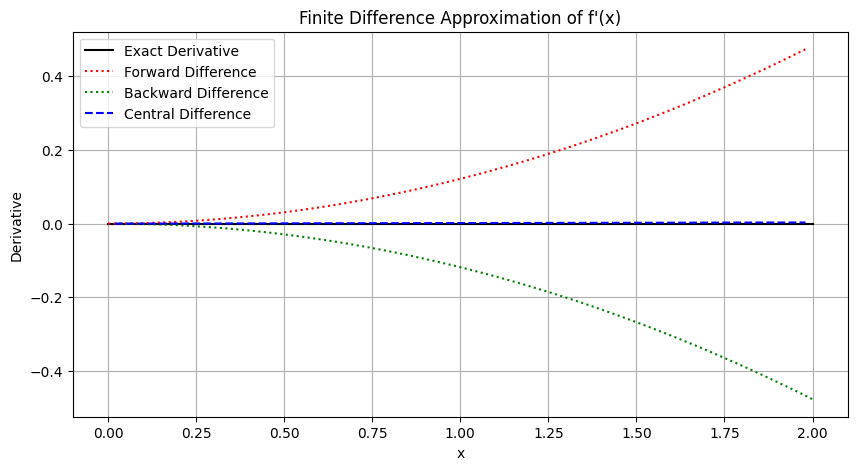

In [36]:
# Parameters
N = 10**2
Differentiation_range = [0, 2]
Interval_h = ( Integration_range[1] - Integration_range[0] ) / N
sampling_points = np.arange(Integration_range[0], Integration_range[1] + Interval_h, Interval_h) # np.arange(Start, End, Step_size) => output: "Start" to "End - Step_size"


# Compute derivatives
forward_values = np.array([forward_diff(f, x, Interval_h) for x in sampling_points[:-1]]) - exact_values[:-1]  # Exclude last point
backward_values = np.array([backward_diff(f, x, Interval_h) for x in sampling_points[1:]]) - exact_values[1:] # Exclude first point
central_values = np.array([central_diff(f, x, Interval_h) for x in sampling_points[1:-1]]) - exact_values[1:-1] # Exclude first and last points
exact_values = df_exact(sampling_points)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(sampling_points, exact_values - exact_values, label="Exact Derivative", linestyle="solid", color="black")
plt.plot(sampling_points[:-1], forward_values, label="Forward Difference", linestyle="dotted", color="r")
plt.plot(sampling_points[1:], backward_values, label="Backward Difference", linestyle="dotted", color="g")
plt.plot(sampling_points[1:-1], central_values, label="Central Difference", linestyle="dashed", color="b")

plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Finite Difference Approximation of f'(x)")
plt.legend()
plt.grid(True)
plt.show()